BDS^3 2024
==========

## Масиви та зобрарженгя в Python
---
_Borys Olifirov, 07.2024, Uzhhorod_

In [2]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

# Списки vs. масиви
---

## Основні властивості

In [3]:
demo_list = [0, 1, 4, 6, 2]
demo_list

[0, 1, 4, 6, 2]

In [4]:
demo_arr = np.array([0, 1, 4, 6, 2])
demo_arr

array([0, 1, 4, 6, 2])

In [5]:
demo_list > 1

TypeError: '>' not supported between instances of 'list' and 'int'

In [6]:
demo_arr > 1

array([False, False,  True,  True,  True])

## Багатовимірність та індексація

In [1]:
list_2d = [[1,2],[3,4]]
list_2d

[[1, 2], [3, 4]]

In [4]:
arr_2d = np.array([[1,2],[3,4]])
arr_2d

array([[1, 2],
       [3, 4]])

<img src="data/img_arr_structure.png" style="zoom:90%;" />

# Зображення як масиви NumPy
---

### Побудова масок та гістонрами зображення

In [3]:
image = skimage.data.human_mitosis()
image.shape

(512, 512)

7
255


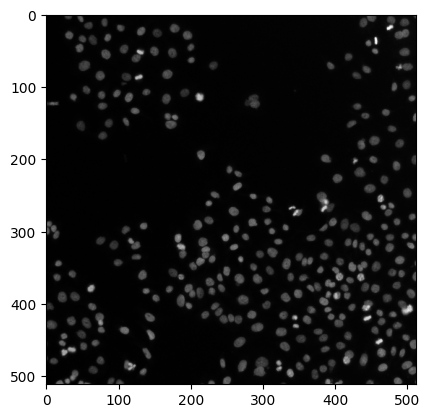

In [11]:
plt.imshow(image, cmap='Greys_r')

print(image.min())
print(image.max())

In [12]:
simple_mask = image > 100

In [13]:
print(simple_mask.shape)
print(image.shape)

(512, 512)
(512, 512)


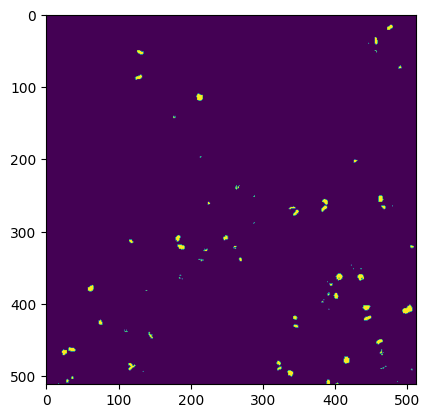

In [14]:
plt.imshow(simple_mask)

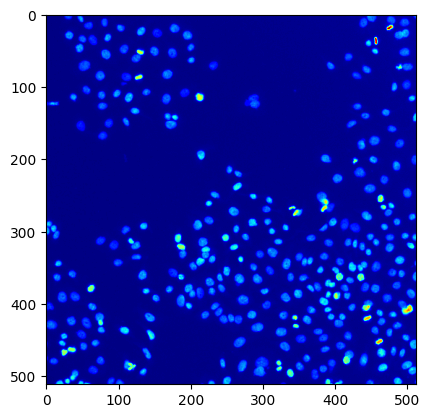

In [15]:
plt.imshow(image, cmap='jet')

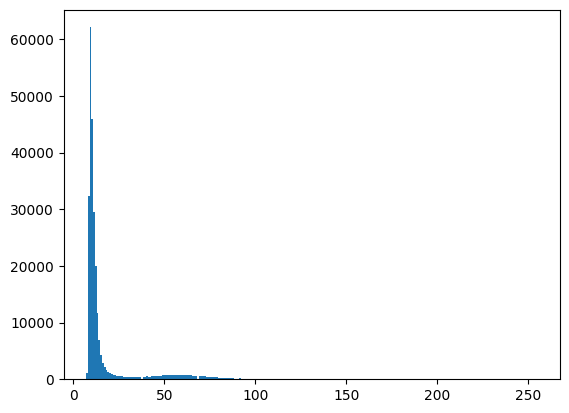

In [16]:
plt.hist(image.ravel(), bins=256)
plt.show()

### Сегментація зображення з використання мульти-Отсу

In [ ]:
th_otsu = skimage.filters.threshold_otsu(image)
th_otsu

In [ ]:
otsu_mask = image > th_otsu
plt.imshow(otsu_mask)
plt.show()

plt.imshow(simple_mask)
plt.show()

In [ ]:
multi_otsu_th = skimage.filters.threshold_multiotsu(image)
multi_otsu_th

In [ ]:
cell_segments = np.digitize(image, bins=multi_otsu_th)

plt.imshow(image)
plt.show()
plt.imshow(cell_segments)
plt.show()

### Фільтр Гауса

In [ ]:
plt.plot(image[130, :])

In [ ]:
image_filtered = skimage.filters.gaussian(image, sigma=2)

plt.imshow(image_filtered)
plt.show()

plt.imshow(image)
plt.show()

### Морфологічні оператори

In [ ]:
plt.imshow(cell_segments)
plt.show()

In [ ]:
nucl_mask = ~(cell_segments < 2)

plt.imshow(nucl_mask)
plt.show()

In [ ]:
demo_arr = [[0, 1, 0, 0],
            [0, 1, 1, 0],
            [0, 1, 1, 0],
            [0, 0, 0, 0]]

plt.imshow(demo_arr)

In [ ]:
foot = [[1,1,1],
        [1,1,1],
        [1,1,1]]
disk_foot = skimage.morphology.disk(20)
nucl_erosion = skimage.morphology.erosion(nucl_mask, footprint=disk_foot)

plt.imshow(nucl_mask)
plt.show()

plt.imshow(nucl_erosion)
plt.show()

In [ ]:
disk_foot_d = skimage.morphology.disk(10)
nucl_dilation = skimage.morphology.dilation(nucl_mask, footprint=disk_foot_d)

plt.imshow(nucl_mask)
plt.show()

plt.imshow(nucl_dilation)
plt.show()

In [ ]:
foot_e_d = skimage.morphology.disk(5)

eroded_mask = skimage.morphology.erosion(nucl_mask, footprint=foot_e_d)
fin_mask = skimage.morphology.dilation(eroded_mask, footprint=foot_e_d) 

plt.imshow(nucl_mask)
plt.show()

plt.imshow(fin_mask)
plt.show()

In [ ]:
op_mask = skimage.morphology.opening(nucl_mask, footprint=foot_e_d)

plt.imshow(op_mask)

# Фільтрація зображень
---

In [ ]:
image_series = skimage.io.imread('data/cell_series.tif')
image_series.shape

In [ ]:
plt.imshow(image_series[0])

In [ ]:
ctrl_img = np.mean(image_series, axis=0)

plt.imshow(ctrl_img, cmap='jet')
plt.show()

plt.imshow(image_series[15], cmap='jet')
plt.show()

In [ ]:
ctrl_img_blure = skimage.filters.gaussian(ctrl_img, sigma=1.5)      # розмиття картинки
th_multi = skimage.filters.threshold_multiotsu(ctrl_img_blure)      # обчислення порогів мульти Отсу
ctrl_img_segmentation = np.digitize(ctrl_img_blure, bins=th_multi)  # сегментація картинки

In [ ]:
plt.imshow(ctrl_img_segmentation)

Побудова масок елементів клітини

In [ ]:
cytoplasm_mask = ctrl_img_segmentation == 1
plt.imshow(cytoplasm_mask)

In [ ]:
nucleus_mask = ctrl_img_segmentation == 2
plt.imshow(nucleus_mask)

In [ ]:
from numpy import ma

masked_cytoplasm = ma.masked_where(~cytoplasm_mask, ctrl_img)

plt.imshow(masked_cytoplasm)

In [ ]:
np.mean(masked_cytoplasm)

In [ ]:
plt.imshow(cytoplasm_mask)
plt.show()

plt.imshow(nucleus_mask)
plt.show()

In [ ]:
cytoplasm_int_profile = []

for single_frame in image_series:
    masked_frame = ma.masked_where(~cytoplasm_mask, single_frame)
    frame_mean = np.mean(masked_frame)
    cytoplasm_int_profile.append(frame_mean)

plt.plot(cytoplasm_int_profile)

In [ ]:
nucleus_int_profile = []

for single_frame in image_series:
    masked_frame = ma.masked_where(~nucleus_mask, single_frame)
    frame_mean = np.mean(masked_frame)
    nucleus_int_profile.append(frame_mean)

plt.plot(nucleus_int_profile)

In [ ]:
plt.figure(figsize=[12, 3])
plt.plot(cytoplasm_int_profile, label='Cytoplasm')
plt.plot(nucleus_int_profile, label='Nucleus')

plt.xlabel('Frame num')
plt.ylabel('Intencity, a.u.')
plt.legend()


In [ ]:
demo_arr = np.asarray(demo_list)

demo_list_new = [list_element + 1 for list_element in demo_list]

print(demo_list)
print(demo_list_new)



In [ ]:
import pandas as pd

In [ ]:
frame_num_list = list(range(1, 31))

In [ ]:
demo_dict = {1:'a', 'b':2}

In [ ]:
dict_for_df = {'frame_num':frame_num_list,
               'nucl_int': nucleus_int_profile,
               'cyto_int':cytoplasm_int_profile}

In [ ]:
int_profiles_df = pd.DataFrame(dict_for_df)
int_profiles_df

# Детекція багатаьох об'єктів на зображені
---

In [ ]:
cells_image = skimage.data.human_mitosis()
plt.imshow(cells_image, cmap='jet')

In [ ]:
cells_mask = cells_image > skimage.filters.threshold_otsu(cells_image)
plt.imshow(cells_mask)

In [ ]:
cells_labels = skimage.morphology.label(cells_mask)
plt.imshow(cells_labels, cmap='jet')

In [ ]:
plt.imshow(cells_labels == 150)